# **Chi-Square Test: Association Between Satisfaction and Travel Purpose**

This notebook explores whether there is a significant association between **Passenger Satisfaction Levels** and **Travel Purpose** using the Chi-square test. We will:

1. Load and inspect the dataset.
2. Create a contingency table.
3. Perform the Chi-square test.
4. Interpret the results.

---

## **Step 1: Load and Prepare the Dataset**
We will load the Airline Passenger Satisfaction dataset and extract the relevant columns for our analysis.


In [4]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


---

## **Step 2: Create a Contingency Table**
The contingency table summarizes the observed counts of satisfaction levels for each travel purpose.


Contingency Table:
Type of Travel           Business travel  Personal Travel
satisfaction                                             
neutral or dissatisfied            29909            28970
satisfied                          41746             3279


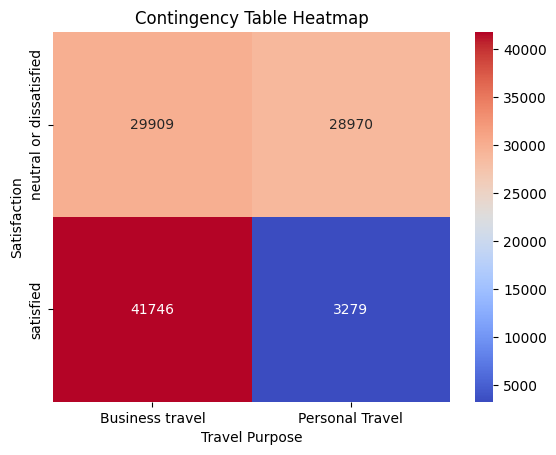

In [9]:
# Create a contingency table
contingency_table = pd.crosstab(df['satisfaction'], df['Type of Travel'])
print("Contingency Table:")
print(contingency_table)
# Visualize the contingency table
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="coolwarm")
plt.title("Contingency Table Heatmap")
plt.xlabel("Travel Purpose")
plt.ylabel("Satisfaction")
plt.show()

---

## **Step 3: Perform the Chi-Square Test**
We will perform the Chi-square test to check for a significant association between Satisfaction and Travel Purpose.


In [6]:
# Perform the Chi-Square Test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("\nChi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
print(expected)



Chi-Square Test Results:
Chi-Square Statistic: 20945.233826061667
P-Value: 0.0
Degrees of Freedom: 1

Expected Frequencies:
[[40604.54597513 18274.45402487]
 [31050.45402487 13974.54597513]]


---

## **Step 4: Interpret the Results**
Based on the p-value, we will determine whether to reject the null hypothesis that there is no association between Satisfaction and Travel Purpose.

**Significance Level (α):** 0.05


In [7]:
# Interpret the results
alpha = 0.05
if p < alpha:
    print("\nConclusion: There is a significant association between Satisfaction and Travel Purpose.")
else:
    print("\nConclusion: There is no significant association between Satisfaction and Travel Purpose.")



Conclusion: There is a significant association between Satisfaction and Travel Purpose.


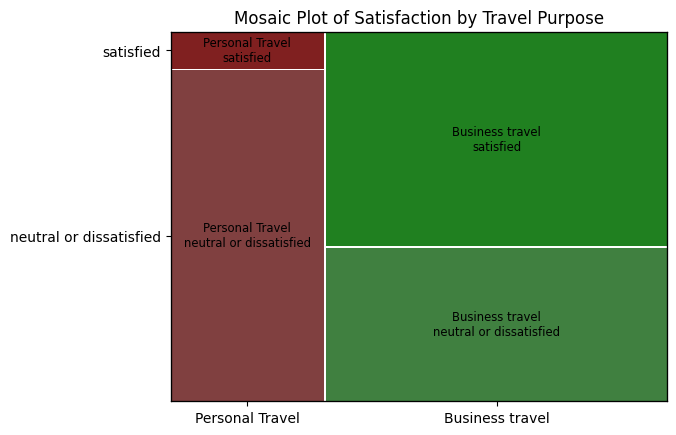

In [12]:
from statsmodels.graphics.mosaicplot import mosaic

# Mosaic plot
mosaic(df, ['Type of Travel', 'satisfaction'], title='Mosaic Plot of Satisfaction by Travel Purpose')
plt.show()
